In [2]:
import pandas as pd
import numpy as np
import datetime
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Lecture .csv

df = pd.read_csv("Camp_Market.csv", sep=';')

# Création de variables

In [45]:
# Encodage One-Hot
data_encoded = pd.get_dummies(df, columns=['Education'])

#var Living_with
def love_status(status):
    if status == "Single" or status == "Widow" or status == "Divorced":
        return 'Single'
    elif status == "Together" or status == "Married":
        return 'In a relationship'
data_encoded["Living_with"] = df["Marital_Status"].apply(love_status)

#var Family_size
data_encoded["Family_size"] = data_encoded["Kidhome"] + np.where(
    (data_encoded["Marital_Status"] == "Together") | (data_encoded["Marital_Status"] == "Married"), 
    2, 
    1
)

# var Customer_for nombre de jours depuis que le client a commencé ses achats au magasin depuis la dernière date enregistrée
today = pd.Timestamp(datetime.date.today())
data_encoded["Customer_for"] = (today - pd.to_datetime(df["Dt_Customer"])).dt.days

# var Age
data_encoded["Age"] = date.today().year - data_encoded["Year_Birth"]

#var Spend
data_encoded["Spent"] = data_encoded[[col for col in df.columns if col.startswith('Mnt')]].sum(axis=1)

#var Is_parent
data_encoded["Is_parent"] = np.where((data_encoded["Kidhome"] > 0) | (data_encoded["Teenhome"] > 0), 1, 0)

#var Children
data_encoded["Children"] = data_encoded.Kidhome + data_encoded.Teenhome

#var education2

def edu_level(level):
    if (level == "Master" or level == "Phd") :
        return 2
    elif(level == "Graduation") :
        return 1
    else :
        return 0

data_encoded["Education2"] = df["Education"].apply(edu_level)

# drop des colonnes non utilisées
data_encoded = data_encoded.drop(columns=["Dt_Customer", "Marital_Status", "Dt_Customer", "Year_Birth", "Kidhome", "Teenhome", "Living_with", "Education_Master", "Education_PhD", "Education_Graduation", "Education_Basic", "Education_2n Cycle"])
print(data_encoded.head(5))

     ID   Income  Recency  MntWines  MntFruits  MntMeatProducts  \
0  5524  58138.0       58       635         88              546   
1  2174  46344.0       38        11          1                6   
2  4141  71613.0       26       426         49              127   
3  6182  26646.0       26        11          4               20   
4  5324  58293.0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  ...  \
0              172                88            88                  3  ...   
1                2                 1             6                  2  ...   
2              111                21            42                  1  ...   
3               10                 3             5                  2  ...   
4               46                27            15                  5  ...   

   Z_CostContact  Z_Revenue  Response  Family_size  Customer_for  Age  Spent  \
0              3         11         1           

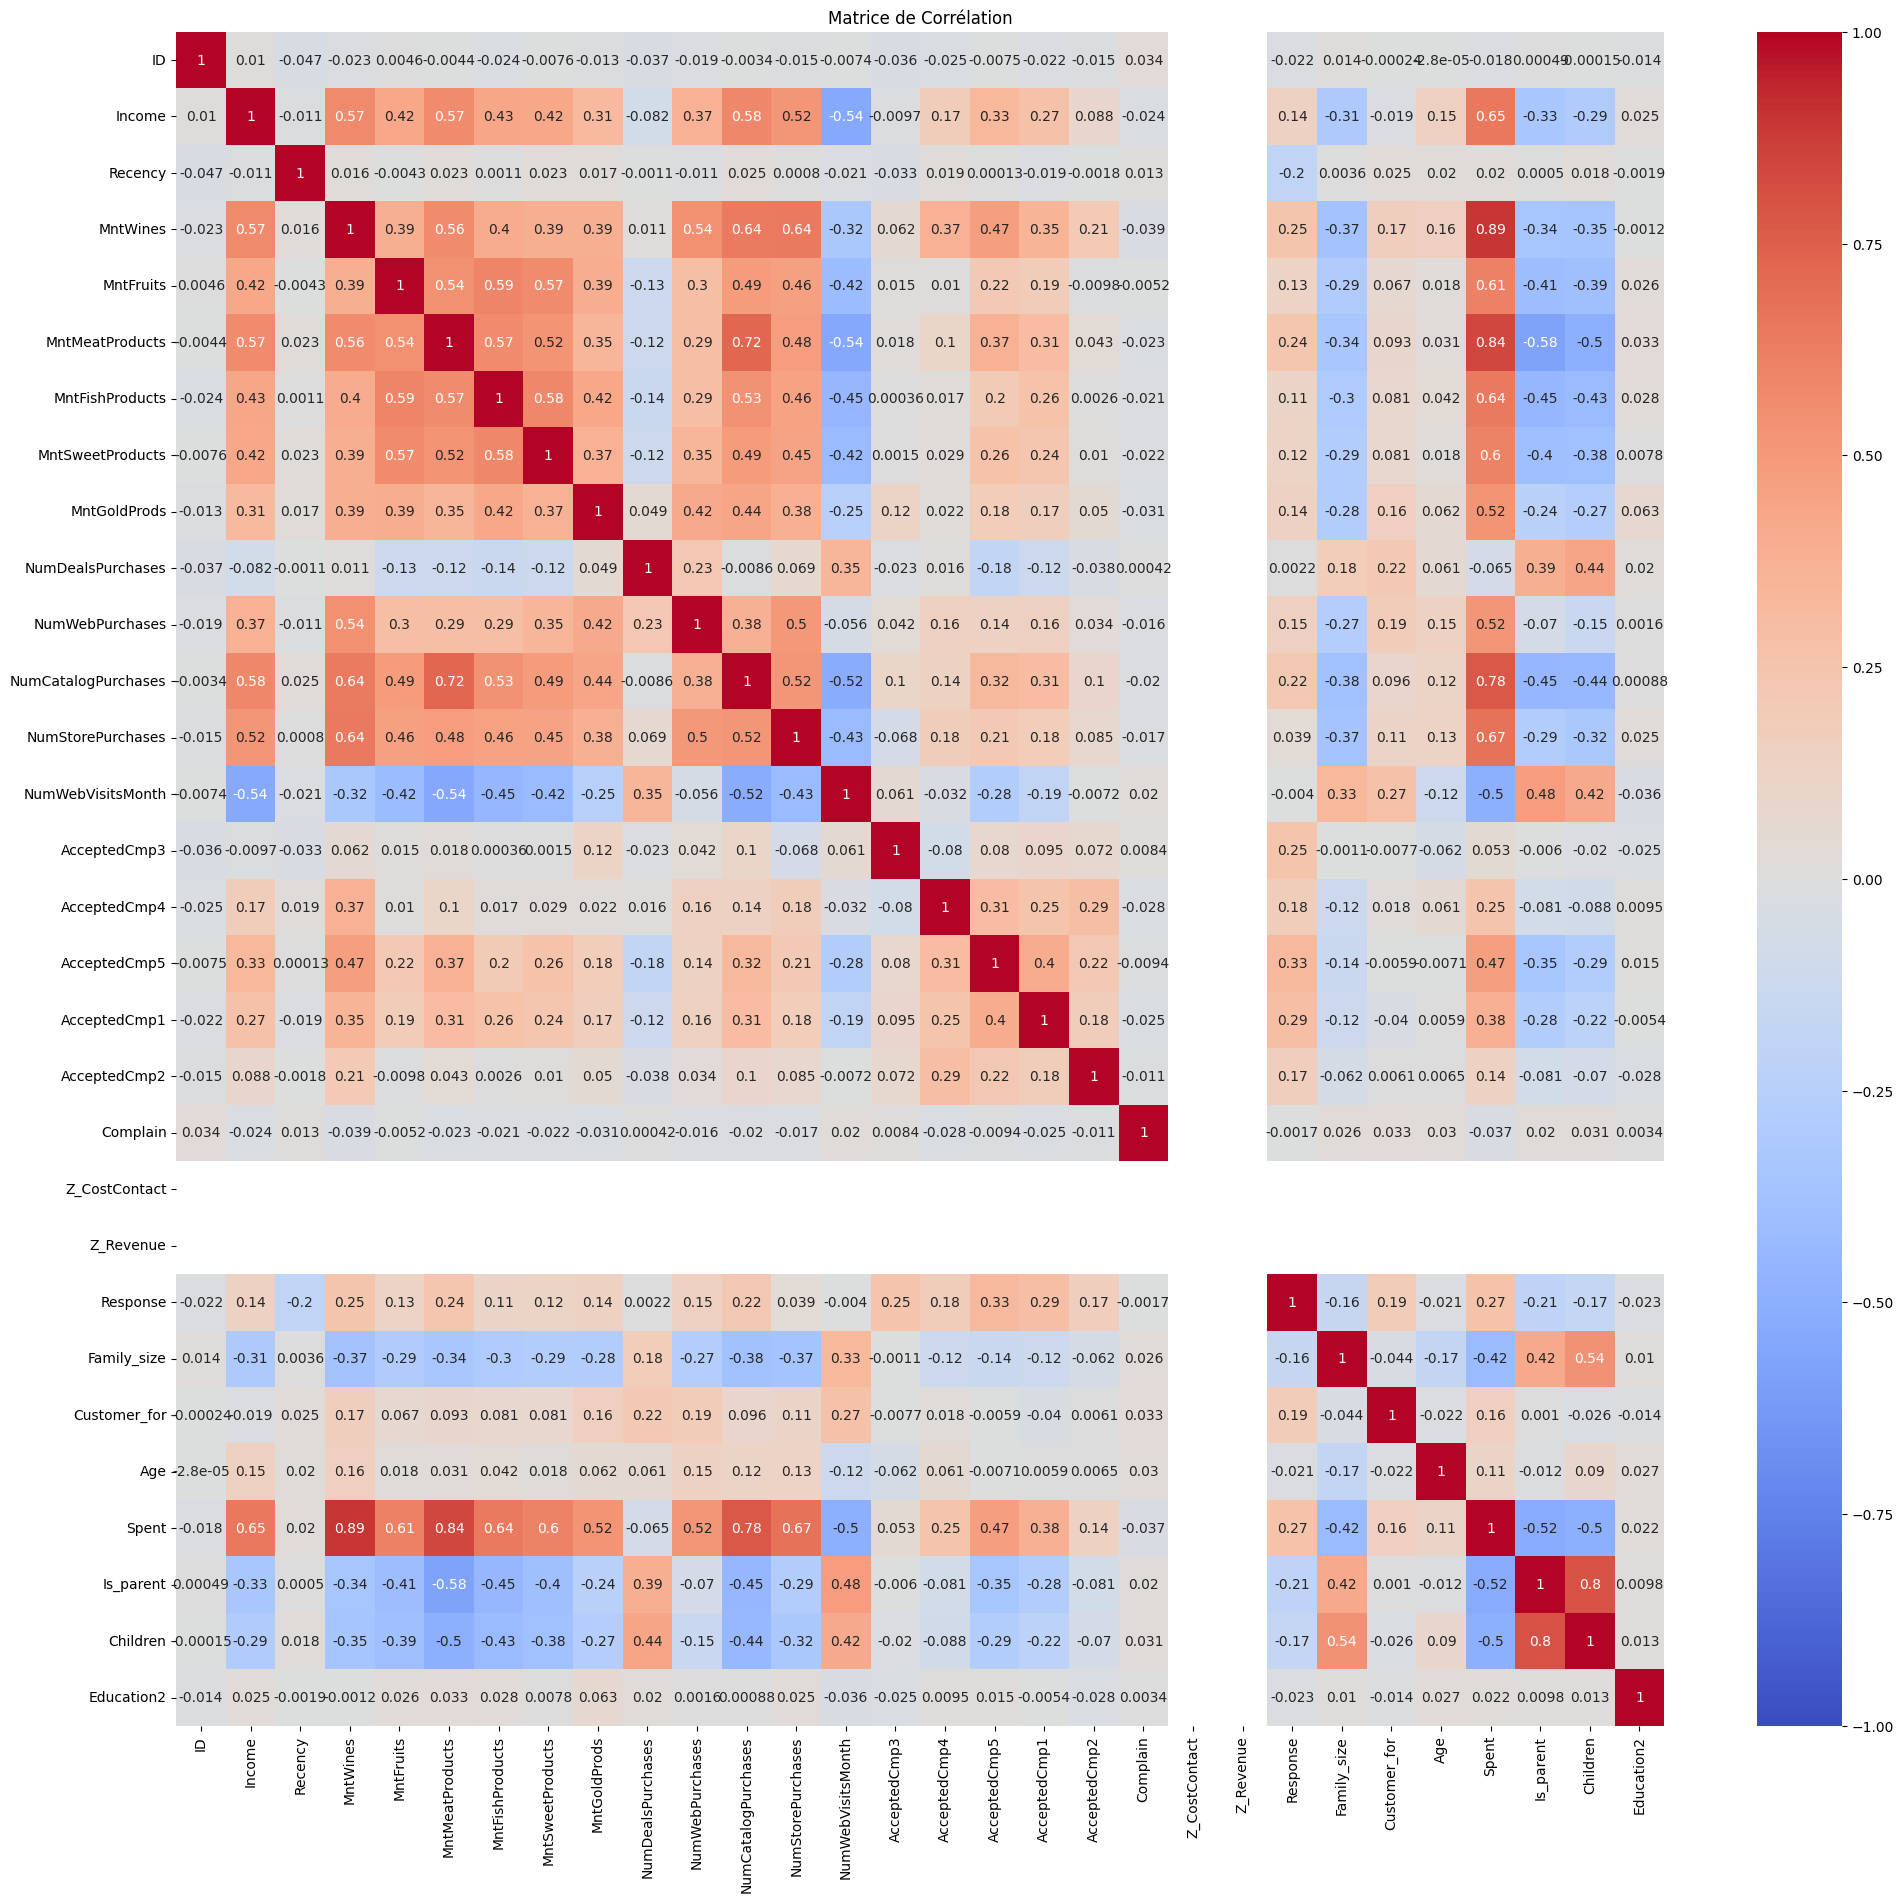

In [44]:
# Calcul de la matrice de corrélation pour le dataframe encodé
corr_matrix_encoded = data_encoded.corr()

#Remplacement NaN par 0
data_encoded = data_encoded.fillna(0)

plt.figure(figsize=(15, 13))
sns.heatmap(corr_matrix_encoded, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matrice de Corrélation")
plt.show()

# Répartition des données par colonne

<Axes: xlabel='variable', ylabel='value'>

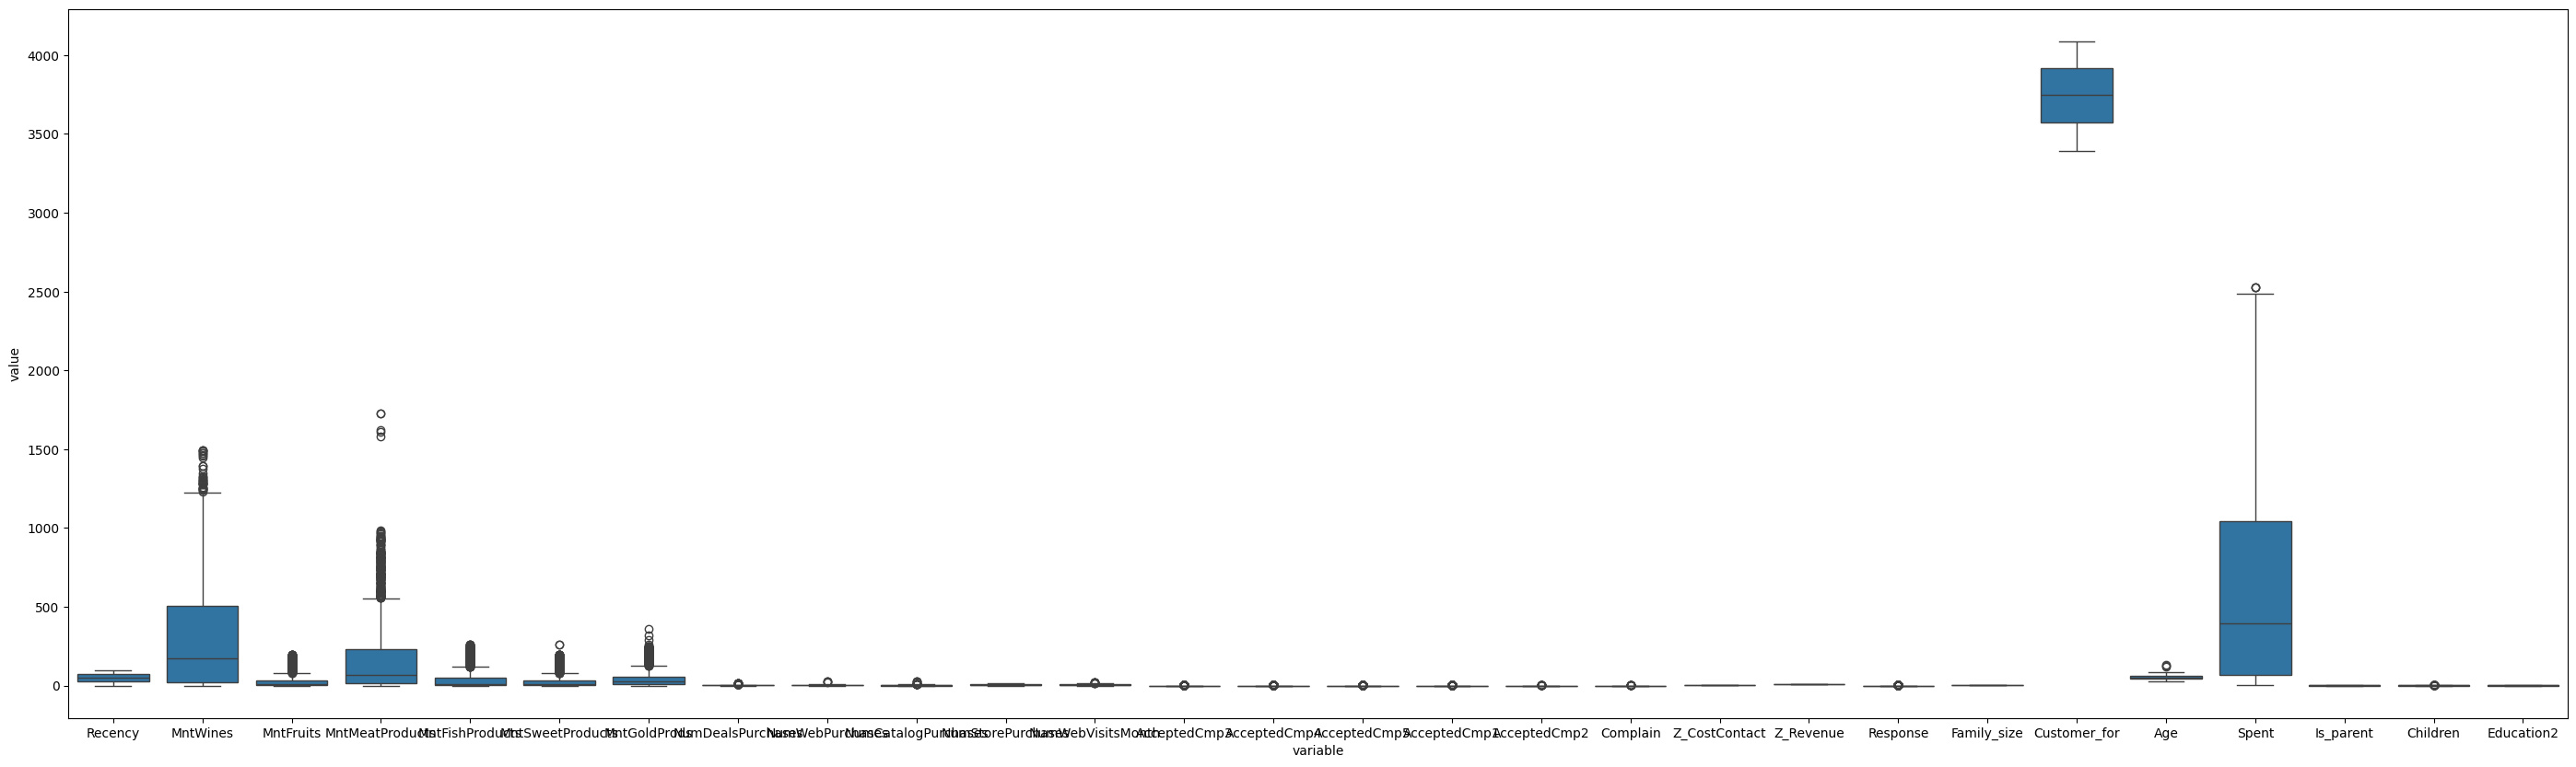

In [38]:
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 35, 10
sns.boxplot(x='variable', y='value', data=pd.melt(data_encoded.drop(columns=["Income", "ID"])))

<Axes: xlabel='variable', ylabel='value'>

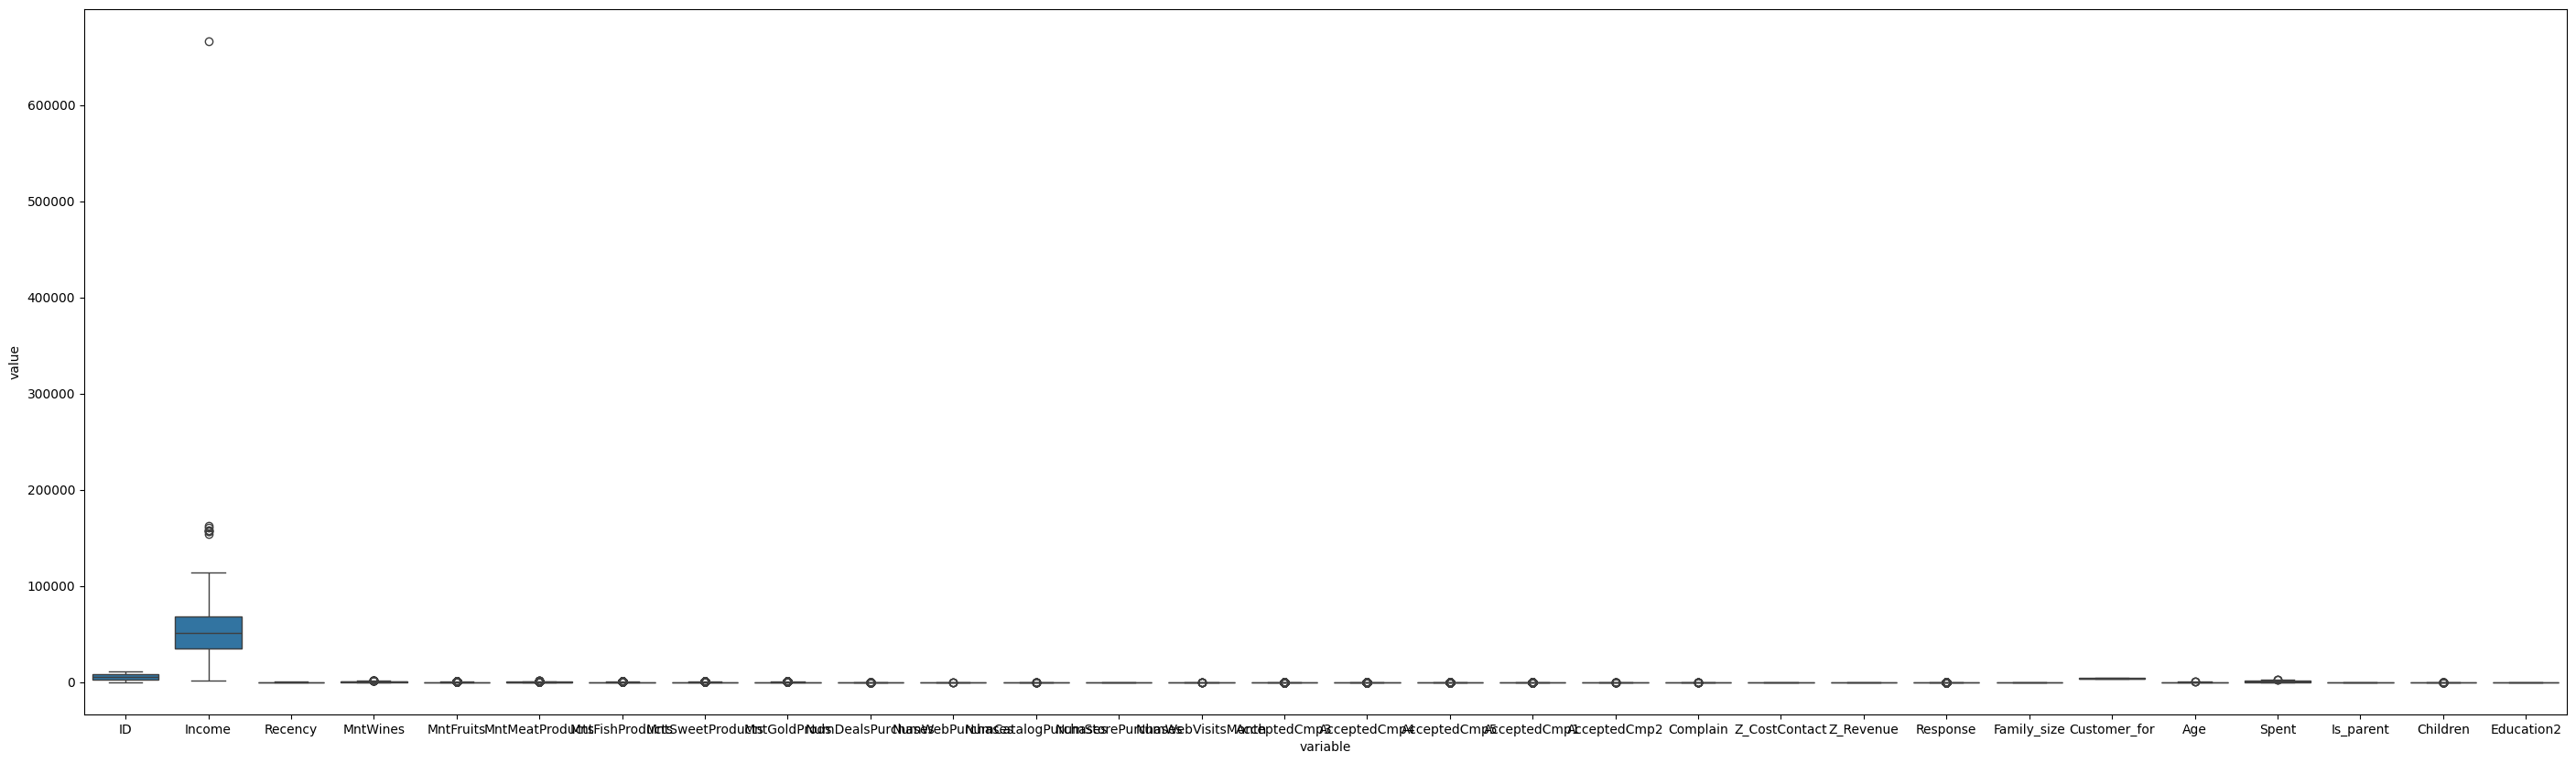

In [46]:
sns.boxplot(x='variable', y='value', data=pd.melt(data_encoded))

In [ ]:
# Dropping aberrant values

<Axes: xlabel='variable', ylabel='value'>

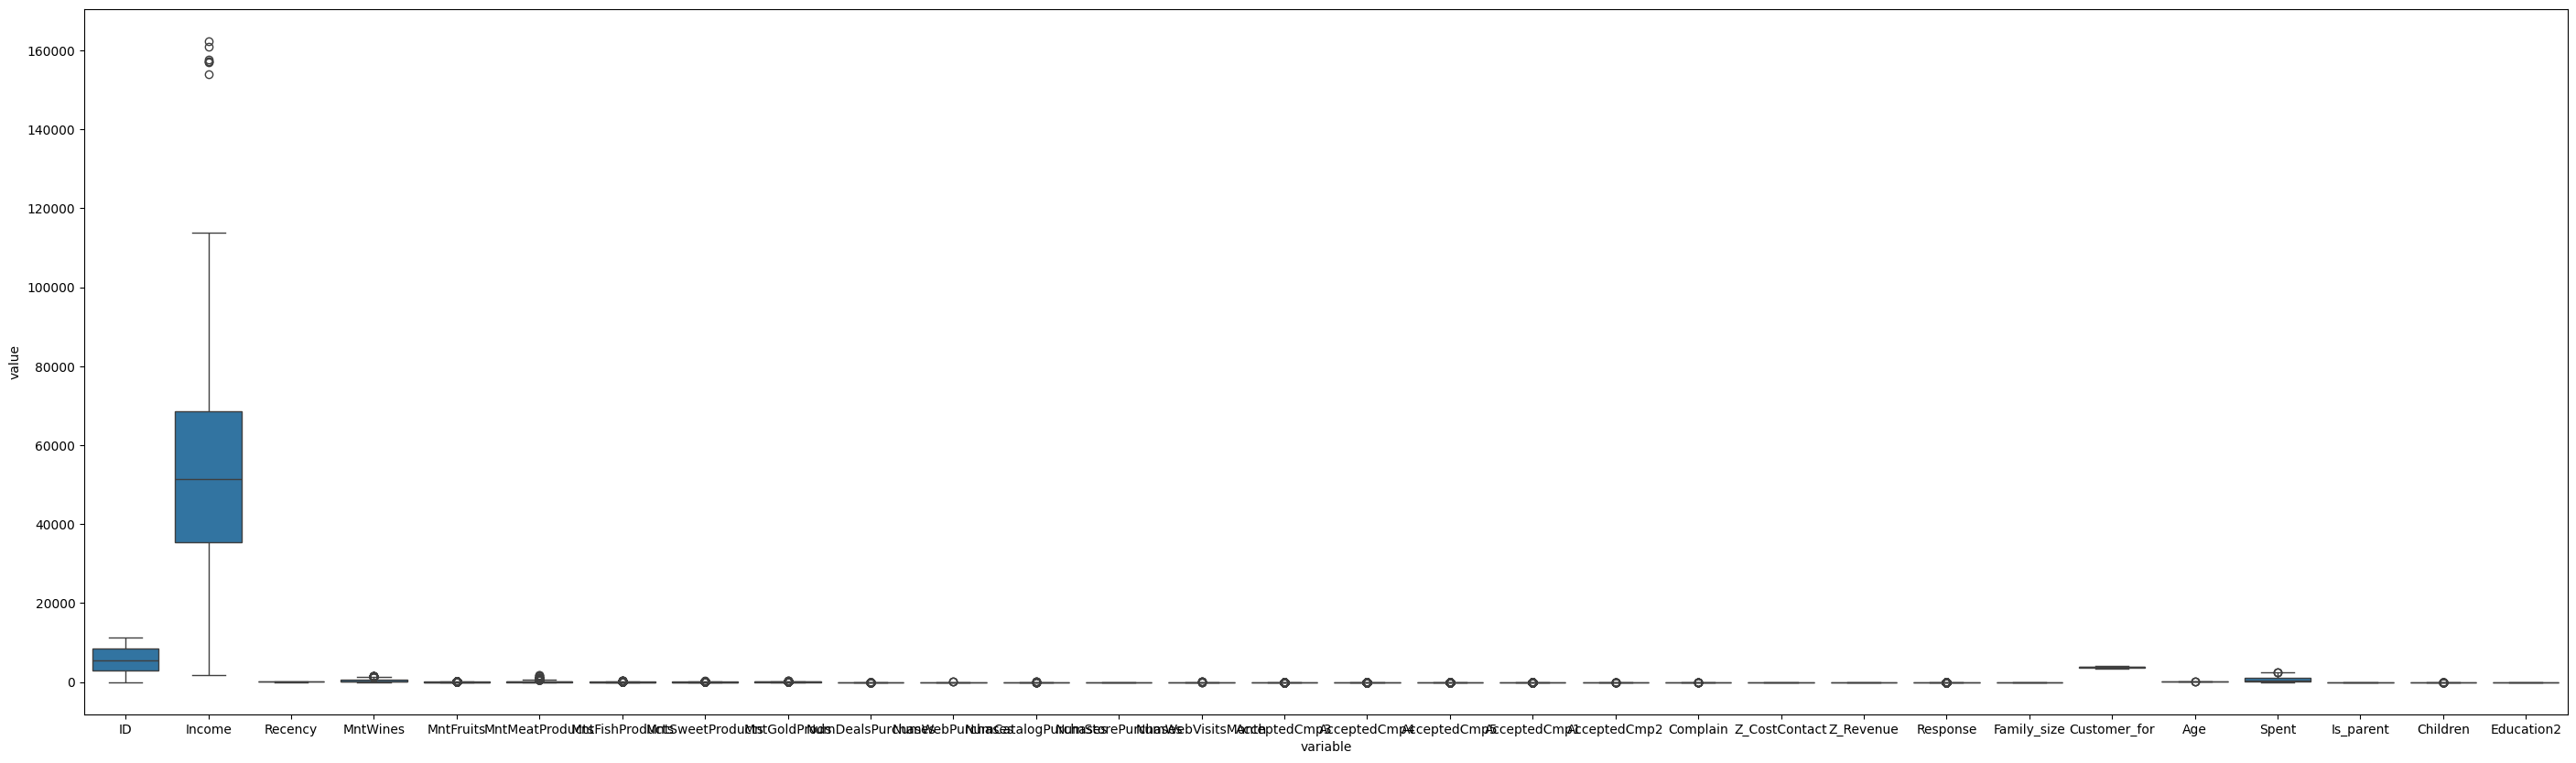

In [48]:
data_encoded = data_encoded[data_encoded.Income < 600000]